<a href="https://colab.research.google.com/github/DarkCoder999/WebDev_Task1/blob/main/DatabyteTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

In [2]:
pd.set_option("display.precision", 8)

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
dataset='/content/drive/My Drive/Avenger'

Mounted at /content/drive


In [4]:
Img_dim = (224, 224)
train_dir = str(dataset)
print(train_dir)
datagenArgs = dict(rescale=1./255, validation_split=.15)
datagenArgs
training_gen = tf.keras.preprocessing.image.ImageDataGenerator(**datagenArgs)
gen_train  = training_gen.flow_from_directory(train_dir, subset = "training", shuffle = True, target_size =Img_dim)
validation_gen = tf.keras.preprocessing.image.ImageDataGenerator(**datagenArgs)
gen_valid = validation_gen.flow_from_directory(train_dir, subset = "validation", shuffle = True, target_size =Img_dim)

/content/drive/My Drive/Avenger
Found 1806 images belonging to 5 classes.
Found 315 images belonging to 5 classes.


In [5]:
dataLabels = sorted(gen_train.class_indices.items(), key=lambda pair:pair[1])
dataLabels = np.array([key.title() for key, value in dataLabels])
print(dataLabels)

['Blackwidow' 'Captainamerica' 'Hulk' 'Ironman' 'Thor']


In [ ]:
model = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", output_shape=[1280], trainable=False), tf.keras.layers.Dropout(0.4), tf.keras.layers.Dense(gen_train.num_classes, activation='softmax')])
model
model.build([None, 224, 224, 3])
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
train_epoch_steps = np.ceil(gen_train.samples/gen_train.batch_size)
val_epoch_steps = np.ceil(gen_valid.samples/gen_valid.batch_size)
print(train_epoch_steps)
print(val_epoch_steps)
hist = model.fit(gen_train, epochs=15, verbose=1, steps_per_epoch=train_epoch_steps, validation_data=gen_valid, validation_steps=val_epoch_steps)
history = hist.history

57.0
10.0
Epoch 1/15
57/57 [==============================] - ETA: 0s - loss: 1.5624 - acc: 0.4153

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


57/57 [==============================] - 515s 9s/step - loss: 1.5624 - acc: 0.4153 - val_loss: 0.7176 - val_acc: 0.7333
Epoch 2/15
57/57 [==============================] - 94s 2s/step - loss: 0.9292 - acc: 0.6462 - val_loss: 0.5106 - val_acc: 0.8127
Epoch 3/15
57/57 [==============================] - 89s 2s/step - loss: 0.7501 - acc: 0.7143 - val_loss: 0.4186 - val_acc: 0.8571
Epoch 4/15
57/57 [==============================] - 89s 2s/step - loss: 0.6568 - acc: 0.7636 - val_loss: 0.3675 - val_acc: 0.8667
Epoch 5/15
57/57 [==============================] - 92s 2s/step - loss: 0.5817 - acc: 0.7841 - val_loss: 0.3395 - val_acc: 0.8889
Epoch 6/15
57/57 [==============================] - 88s 2s/step - loss: 0.5502 - acc: 0.7979 - val_loss: 0.3345 - val_acc: 0.8889
Epoch 7/15
57/57 [==============================] - 95s 2s/step - loss: 0.5227 - acc: 0.8045 - val_loss: 0.2998 - val_acc: 0.8889
Epoch 8/15
57/57 [==============================] - 91s 2s/step - loss: 0.4652 - acc: 0.8361 - val_l

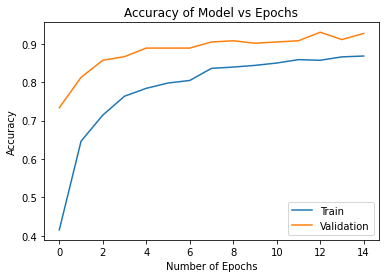

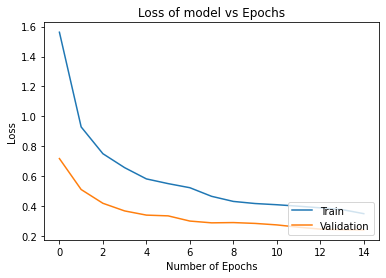

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy of Model vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss of model vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
model.save('saved_models/avengers')
avengers_model = tf.keras.models.load_model('saved_models/avengers')
ValImg_batch, ValLabel_batch = next(iter(gen_valid))
print("Validation batch shape:", ValImg_batch.shape)
true_label_ids = np.argmax(ValLabel_batch, axis=-1) 
print(true_label_ids)

Validation batch shape: (32, 224, 224, 3)
[0 1 0 1 2 1 1 2 3 3 2 0 2 2 2 0 3 3 4 3 4 1 2 4 1 4 2 2 1 3 1 4]


In [ ]:
ModelPred = avengers_model.predict(ValImg_batch)
Pred_Df = pd.DataFrame(ModelPred)
Pred_Df.columns = dataLabels
print("Prediction results for the first elements")
Pred_Df.head()

1/1 [==============================] - 3s 3s/step
Prediction results for the first elements


,Blackwidow,Captainamerica,Hulk,Ironman,Thor
0,0.98894274,0.00024745,0.00287243,0.00017198,0.00776540
1,0.00043027,0.93229955,0.00132068,0.06070781,0.00524180
2,0.54727453,0.39371577,0.00063046,0.00818547,0.05019366
3,0.00122394,0.64772689,0.26760063,0.00644135,0.07700711
4,0.00021440,0.00000948,0.99977112,0.00000186,0.00000324


In [ ]:
Pred_Ids = np.argmax(ModelPred, axis=-1)
print(Pred_Ids)
Pred_Labels = dataLabels[Pred_Ids]
print(Pred_Labels)

[0 1 0 1 2 1 1 2 3 3 2 0 2 2 2 0 3 3 0 3 4 1 2 4 1 4 2 2 1 3 1 4]
['Blackwidow' 'Captainamerica' 'Blackwidow' 'Captainamerica' 'Hulk'
 'Captainamerica' 'Captainamerica' 'Hulk' 'Ironman' 'Ironman' 'Hulk'
 'Blackwidow' 'Hulk' 'Hulk' 'Hulk' 'Blackwidow' 'Ironman' 'Ironman'
 'Blackwidow' 'Ironman' 'Thor' 'Captainamerica' 'Hulk' 'Thor'
 'Captainamerica' 'Thor' 'Hulk' 'Hulk' 'Captainamerica' 'Ironman'
 'Captainamerica' 'Thor']


Text(0.5, 0.98, 'Model predictions (green: correct, red: incorrect)')

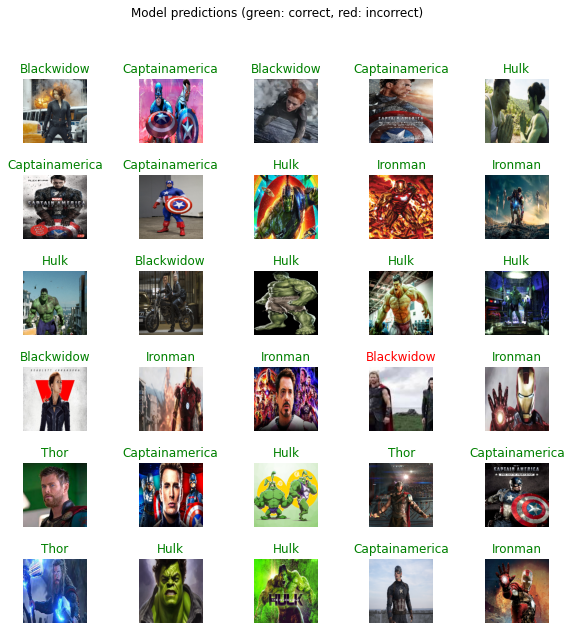

In [ ]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(ValImg_batch[n])
  color = "green" if Pred_Ids[n] == true_label_ids[n] else "red"
  plt.title(Pred_Labels[n].title(), color=color)
  plt.axis('off')
plt.suptitle("Model predictions (green: correct, red: incorrect)")